In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load dataset

df = pd.read_csv('/content/mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
df.isna().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [9]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [7]:
# Features and Labels

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = x.astype('float32')

In [8]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
# Standardisation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
features = x_train.shape[1]

In [13]:
# Build Artificial neural network with 3 hidden layers
# Activation function in hidden layers is relu
# Activation function in output layer is softmax (multiclass classification)
# Input features will be 20

model = Sequential()
# Hidden layer 1
model.add(Dense(128,activation='relu',input_shape=(features,)))
# Hidden layer 2
model.add(Dense(64,activation='relu'))
# Hidden layer 3
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,156 (51.39 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# Train the model

history = model.fit(x_train,y_train,validation_split=0.2,batch_size =32,verbose=0, epochs=100)

In [16]:
# Model Evaluation

loss,acc = model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9014 - loss: 0.3957  


In [18]:
x_test[2]

array([ 0.6590819 ,  1.0356345 ,  0.32280824,  0.9838799 , -0.98067284,
       -1.0240388 , -1.2008203 ,  0.34724653,  0.9950892 , -0.22352861,
       -1.4532169 , -1.1260371 , -1.6393942 ,  0.53321654,  0.8824043 ,
       -0.18620798,  0.3638526 ,  0.56483954, -0.9863432 ,  0.97530484],
      dtype=float32)

In [19]:
# Predict the price range for the 7th data point in the test set
prediction = model.predict(x_test[6].reshape(1, -1))

# The prediction will be a probability distribution over the 4 price ranges.
# To get the predicted price range, we can find the index with the highest probability.
predicted_price_range = np.argmax(prediction)

print(f"The predicted price range for the 7th data point is: {predicted_price_range}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The predicted price range for the 7th data point is: 0


In [22]:
# Hyper parameter tuning
# Train 4 models with different learning rates

from tensorflow.keras.optimizers import Adam

# Function to build and train model
def train_model_with_lr(learning_rate):
    #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(features,))) #hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0)
    return history

# Try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    histories[lr] = train_model_with_lr(lr)


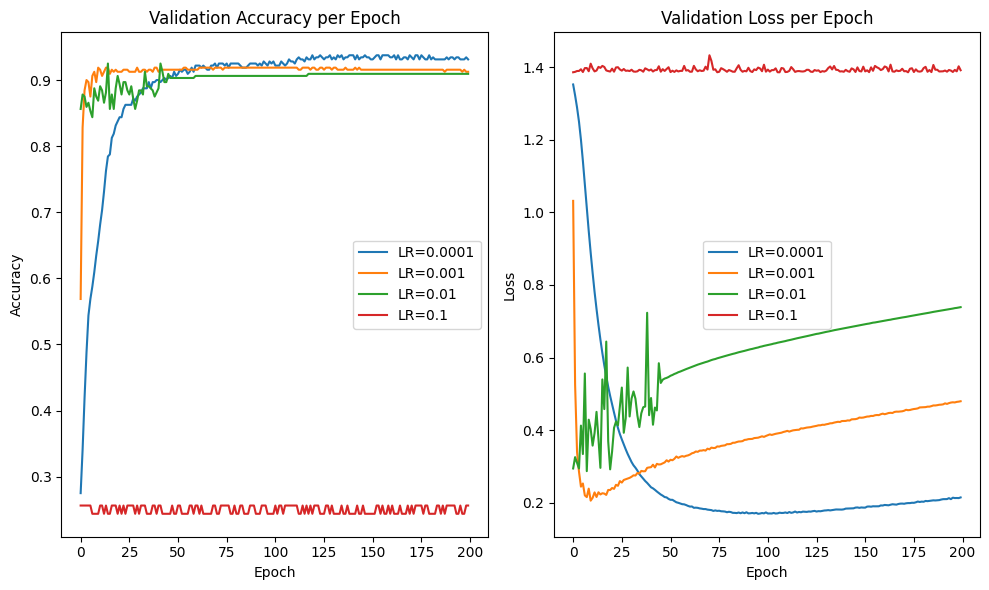

In [23]:
# Plot validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_accuracy'], label=f'LR={lr}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_loss'], label=f'LR={lr}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# lr=.001 is the best learning rate

In [24]:
# Function to train with different batch sizes

def train_model_with_batch(batch_size):
    #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=0.001)  # Best learning rate from previous tuning
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=batch_size, verbose=0)
    return history

# Try batch sizes: 4, 8, 16, 32
batch_sizes = [16, 32,64,128]
histories = {}

for batch in batch_sizes:
    histories[batch] = train_model_with_batch(batch)

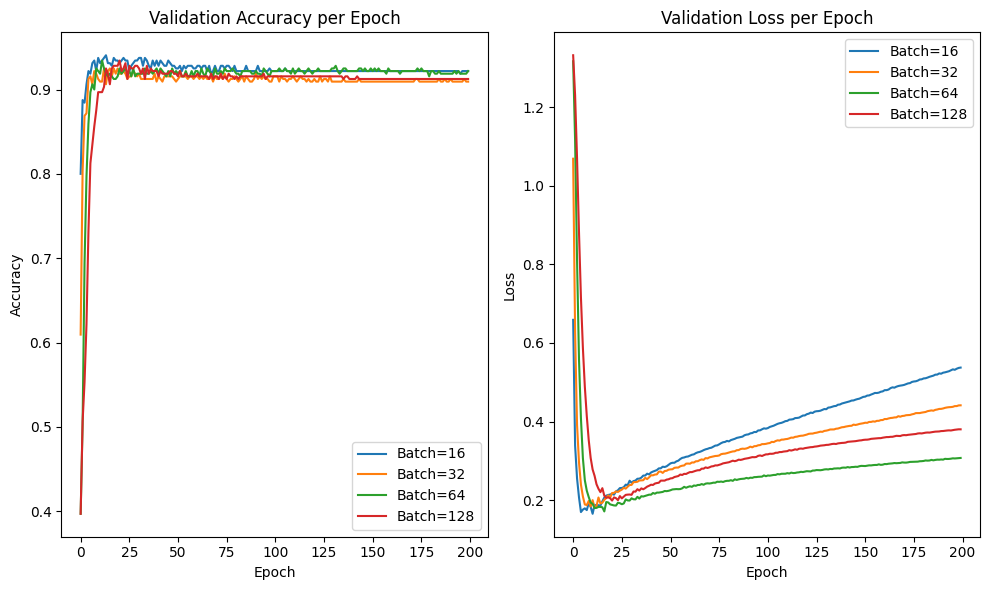

In [25]:
# Plot the results
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for batch in batch_sizes:
    plt.plot(histories[batch].history['val_accuracy'], label=f'Batch={batch}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for batch in batch_sizes:
    plt.plot(histories[batch].history['val_loss'], label=f'Batch={batch}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Batch = 16 and 32 performs good

In [26]:
# Train model with a given number of epochs
def train_model_with_epochs(num_epochs):
     #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=0.001)#best lr
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_split=0.2, epochs=num_epochs, batch_size=16, verbose=0)#best batch size
    return history

# Test different epoch values
epoch_values =[20, 30, 40, 50, 60, 75, 100]

histories = {}

for num_epochs in epoch_values:
    histories[num_epochs] = train_model_with_epochs(num_epochs)

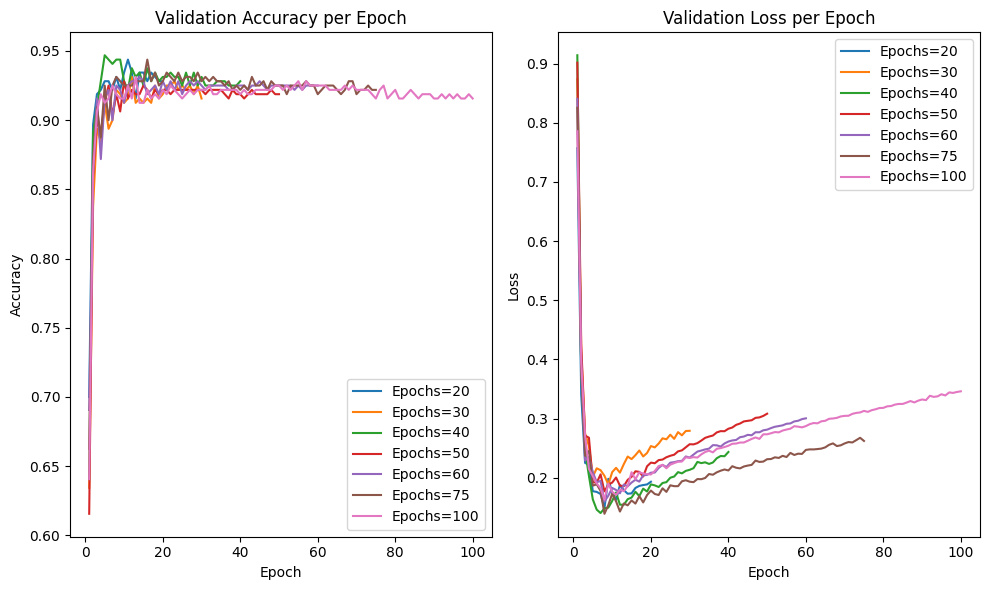

In [27]:
# Plotting validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for num_epochs in epoch_values:
    val_acc = histories[num_epochs].history['val_accuracy']
    plt.plot(range(1, len(val_acc)+1), val_acc, label=f'Epochs={num_epochs}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for num_epochs in epoch_values:
    val_loss = histories[num_epochs].history['val_loss']
    plt.plot(range(1, len(val_loss)+1), val_loss, label=f'Epochs={num_epochs}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Best parameters
# Epoch 40 suits well
# batch_size=64 lr=0.001

In [29]:
# Optimizer evaluation

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Train model with a given optimizer
def train_model_with_optimizer(optimizer):
   #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=16, verbose=0) #best batch size
    return history

# Try different optimizers
optimizers = {
    "Adam": Adam(learning_rate=0.001),
    "SGD": SGD(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001)
}

histories = {name: train_model_with_optimizer(opt) for name, opt in optimizers.items()}


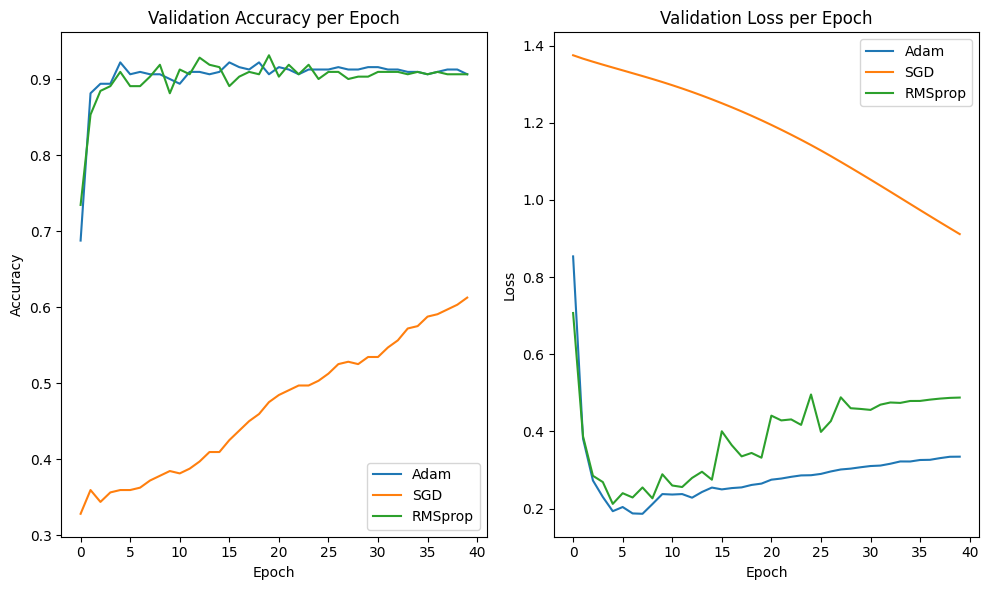

In [30]:
# Plot results
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for name in histories:
    plt.plot(histories[name].history['val_accuracy'], label=name)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for name in histories:
    plt.plot(histories[name].history['val_loss'], label=name)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Adam optimizer showing best result

In [32]:
# Model with tuned parameters
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(features,)))#hidden layer 1
model.add(Dense(64,activation='relu'))#hidden layer 2
model.add(Dense(32,activation='relu'))#hidden layer 3
model.add(Dense(4,activation='softmax'))#output layer
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=16, verbose=0)

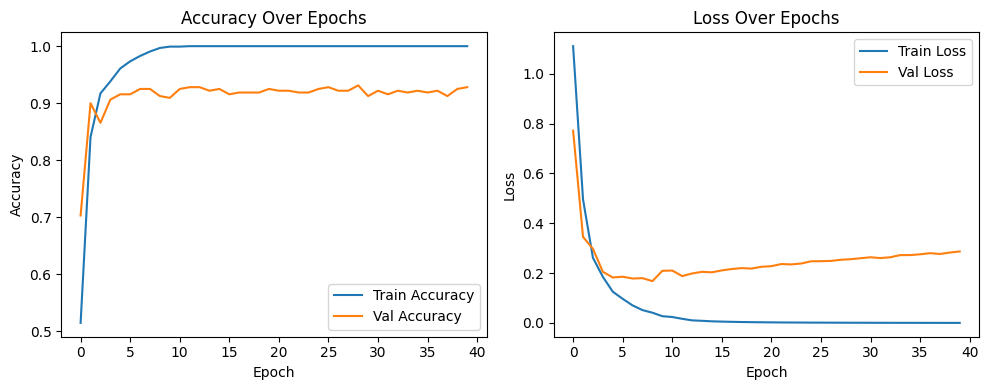

In [33]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
loss,acc = model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9131 - loss: 0.3461  


In [35]:
loss,acc=model.evaluate(x_train,y_train)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0074    


In [ ]:
# ON TRAINING DATA I GOT BETTER ACCURACY BUT TEST ACCURACY IS LESS,WHICH INDICATES OVERFITTING
# USE FOLLOWING TECHNIQUE TO REDUCE OVERFITTING
# Add Dropout Layers Dropout randomly disables neurons during training, helping prevent the model from relying too much on specific features.
# Use EarlyStopping To stop training when validation performance stops improving

In [36]:
#ADD DROPOUT LAYERS
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(features,)))
model.add(Dropout(0.3))  # added
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # added
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [37]:
#ADD EARLY STOPPING

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [38]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,  # Try higher, early_stop will stop it early
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)

In [40]:
loss,acc = model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9124 - loss: 0.1818  


In [41]:
loss,acc=model.evaluate(x_train,y_train)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0805


In [ ]:
# The accuracy on the test set has slightly increased.
# The loss on the test set has significantly decreased.
# The gap between training accuracy and test accuracy has reduced.
# The gap between training loss and test loss has also reduced.